In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm


import re

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import csv
import requests
import json
from pandas.io.json import json_normalize
from urllib.request import urlopen

In [3]:
data = pd.read_csv("../data/cleanedDataSetWithGenres.csv")
data.drop('Unnamed: 0', inplace=True, axis=1)

In [3]:
data.head()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0,Pop
1,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0,Pop
2,7 rings,1,2019-03-16,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,Indonesia,125837.0,0.778,0.317,1.0,-10.732,0.3340,0.592,0.000000,0.0881,0.3270,140.048,178627.0,Rap
3,Shape of You,1,2017-03-08,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Portugal,55132.0,0.825,0.652,1.0,-3.183,0.0802,0.581,0.000000,0.0931,0.9310,95.977,233713.0,R&B
4,Someone You Loved,1,2019-03-16,Lewis Capaldi,https://open.spotify.com/track/2TIlqbIneP0ZY1O...,Ireland,63074.0,0.501,0.405,1.0,-5.679,0.0319,0.751,0.000000,0.1050,0.4460,109.891,182161.0,Pop


In [4]:
data.shape

(57372, 19)

In [5]:
list(data)

['title',
 'rank',
 'date',
 'artist',
 'url',
 'region',
 'streams',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'genre']

In [6]:
data['rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
import time
tic = time.perf_counter()

errors = 0

for index, row in data.iterrows():
    try:
        
        #data.at[index,'danceability'] = float(current['danceability'])
        data.at[index,'duration_m'] = float(int((row['duration_ms']/1000)/60)+(int((row['duration_ms']/1000)%60))/100)
        
        print(str(int(((index+1)/data.shape[0])*100)) + '% done - ' + str(index+1) + ' of ' + str(data.shape[0]) + ' songs iterated - ' + errors + ' encountered.', end='\r')
    except:
        #append error or insert specific values?
        errors = errors+1
        pass
    
        
toc = time.perf_counter()
print(f"Added new rows from external links in {toc - tic:0.4f} seconds")

Added new rows from external links in 4.0498 seconds


## Looking at the distribution

In [8]:
data["streams"] = data["streams"].round(5)

In [9]:
data.head()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,duration_m
0,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0,Pop,3.48
1,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0,Pop,3.41
2,7 rings,1,2019-03-16,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,Indonesia,125837.0,0.778,0.317,1.0,-10.732,0.3340,0.592,0.000000,0.0881,0.3270,140.048,178627.0,Rap,2.58
3,Shape of You,1,2017-03-08,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Portugal,55132.0,0.825,0.652,1.0,-3.183,0.0802,0.581,0.000000,0.0931,0.9310,95.977,233713.0,R&B,3.53
4,Someone You Loved,1,2019-03-16,Lewis Capaldi,https://open.spotify.com/track/2TIlqbIneP0ZY1O...,Ireland,63074.0,0.501,0.405,1.0,-5.679,0.0319,0.751,0.000000,0.1050,0.4460,109.891,182161.0,Pop,3.02


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

<AxesSubplot:xlabel='duration_m', ylabel='Density'>

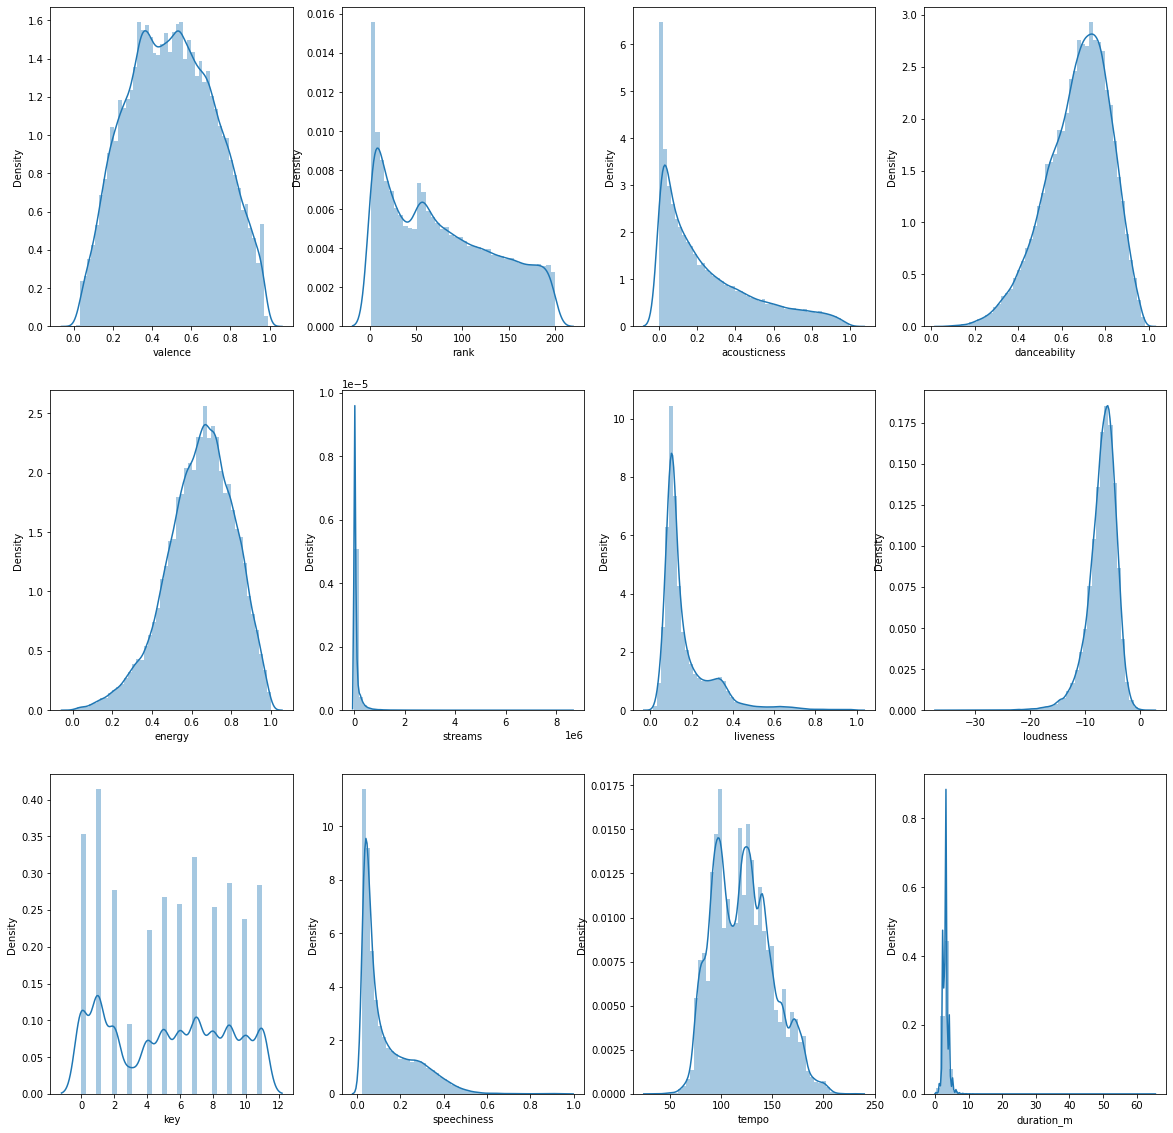

In [10]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(data['valence'],ax=ax[0,0])
sns.distplot(data['acousticness'],ax=ax[0,2])
sns.distplot(data['danceability'],ax=ax[0,3])
sns.distplot(data['streams'],ax=ax[1,1])
sns.distplot(data['energy'],ax=ax[1,0])
sns.distplot(data['rank'],ax=ax[0,1])
sns.distplot(data['liveness'],ax=ax[1,2])
sns.distplot(data['loudness'],ax=ax[1,3])
sns.distplot(data['key'],ax=ax[2,0])
sns.distplot(data['speechiness'],ax=ax[2,1])
sns.distplot(data['tempo'],ax=ax[2,2])
sns.distplot(data['duration_m'],ax=ax[2,3])

# Creating a correlation heatmap

<AxesSubplot:>

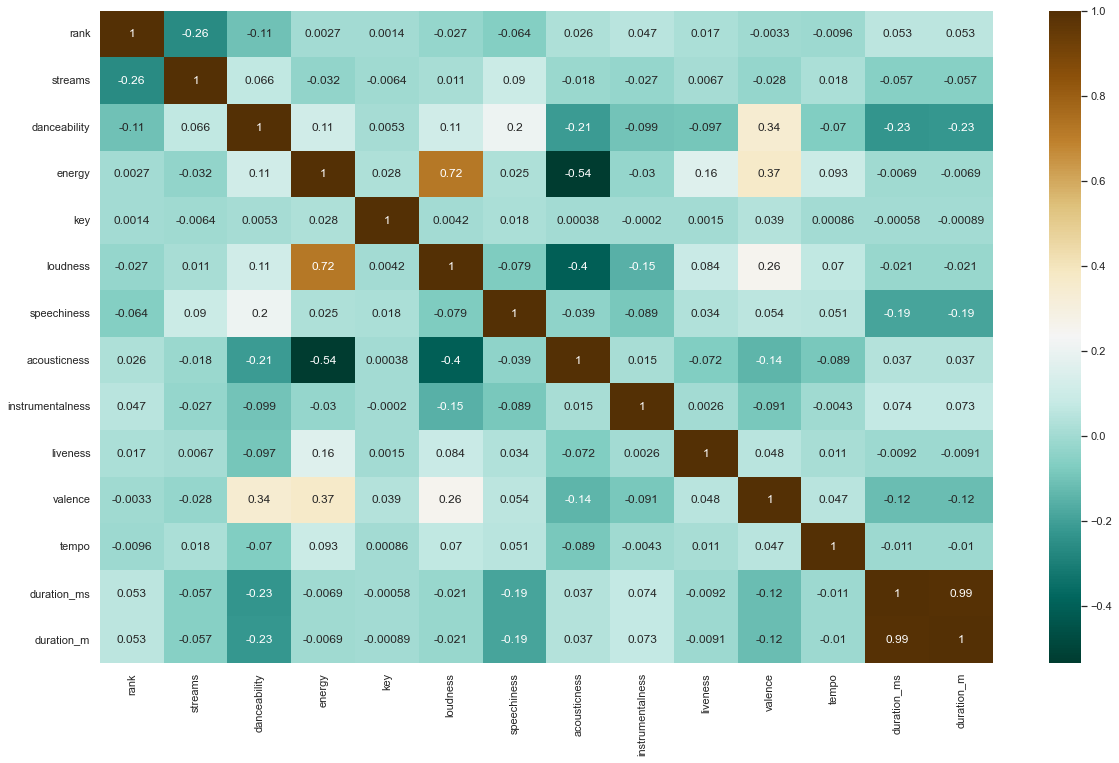

In [12]:
plt.figure(figsize=(20,12))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True, cmap='BrBG_r', annot_kws={"fontsize":12})

In [13]:
# the average in groups
data.groupby("loudness")["energy"].mean()

loudness
-36.406    0.0359
-34.997    0.0455
-34.475    0.1130
-33.350    0.0195
-33.115    0.0309
            ...  
 0.642     0.8550
 1.448     0.9570
 1.585     0.9770
 1.634     0.9930
 1.906     0.5910
Name: energy, Length: 11509, dtype: float64

In [14]:
# weighted mean
x=np.average(data.energy, weights=data.loudness)
x

nan

In [15]:
# trimmed mean - ignores the 10% extream values from both ends (deciles)
from scipy import stats as st
st.trim_mean(data.energy, 0.1)

0.6520385637718419

# Measures of Variability

In [16]:
data.describe()

,rank,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_m
count,57372.000000,5.737200e+04,57366.000000,57366.000000,57366.000000,57366.000000,57366.000000,57366.000000,57366.000000,57366.000000,57366.000000,57366.000000,5.736600e+04,57366.000000
mean,79.371767,8.557642e+04,0.674612,0.643597,5.317000,-6.893381,0.138673,0.255000,0.016381,0.172537,0.500378,121.463134,2.038046e+05,3.193381
std,58.002198,1.930720e+05,0.145735,0.169724,3.615462,2.646666,0.125622,0.245622,0.094087,0.130483,0.220453,28.513609,5.379935e+04,0.903551
min,1.000000,1.001000e+03,0.064500,0.000243,0.000000,-36.406000,0.022200,0.000002,0.000000,0.011900,0.011300,34.099000,3.030100e+04,0.300000
25%,27.000000,7.566000e+03,0.581000,0.537000,2.000000,-8.191750,0.044000,0.054700,0.000000,0.096000,0.331000,98.063000,1.730280e+05,2.530000
50%,70.000000,2.901200e+04,0.693000,0.657000,6.000000,-6.520000,0.082200,0.173000,0.000000,0.121000,0.497000,120.032000,1.980270e+05,3.180000
75%,125.000000,7.874750e+04,0.782000,0.766000,8.000000,-5.149000,0.207000,0.393000,0.000052,0.204000,0.669000,140.032000,2.273198e+05,3.470000
max,200.000000,8.611591e+06,0.983000,1.000000,11.000000,1.906000,0.956000,0.995000,0.990000,0.993000,0.990000,230.270000,3.924548e+06,65.240000


## Checking the types in the dataset

In [17]:
data.dtypes

title                object
rank                  int64
date                 object
artist               object
url                  object
region               object
streams             float64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
genre                object
duration_m          float64
dtype: object

In [96]:
'title',
 'rank',
 'date',
 'artist',
 'url',
 'region',
 'streams',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms'

IndentationError: unexpected indent (646867913.py, line 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='duration_m', ylabel='rank'>

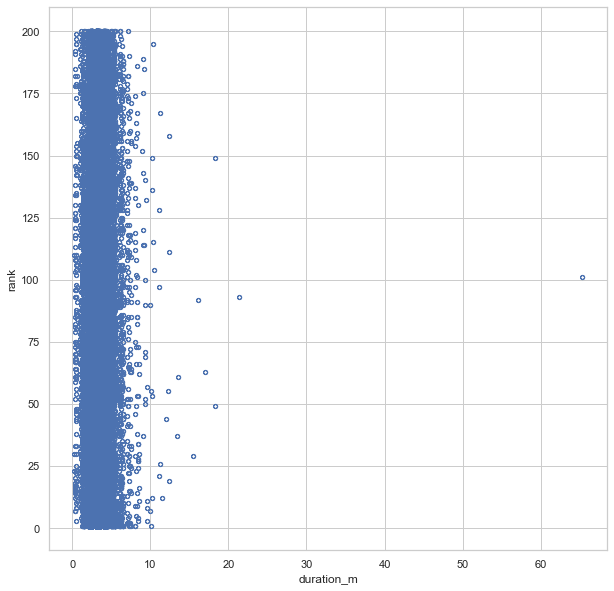

In [18]:
data.plot.scatter(x='duration_m', y='rank', figsize=(10, 10), marker = '$\u25EF$')

<AxesSubplot:>

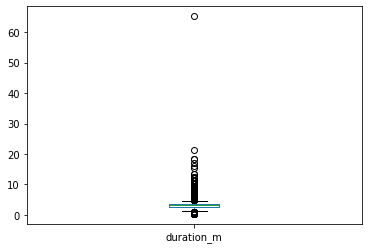

In [21]:
data.boxplot(column =['duration_m'], grid = False)

In [32]:
## position the outlier

outliers = np.where(data['duration_m']>20)
outliers

(array([], dtype=int64),)

In [33]:
data.drop([35366, 37330], inplace=True)

KeyError: '[35366, 37330] not found in axis'

<AxesSubplot:xlabel='rank', ylabel='duration_m'>

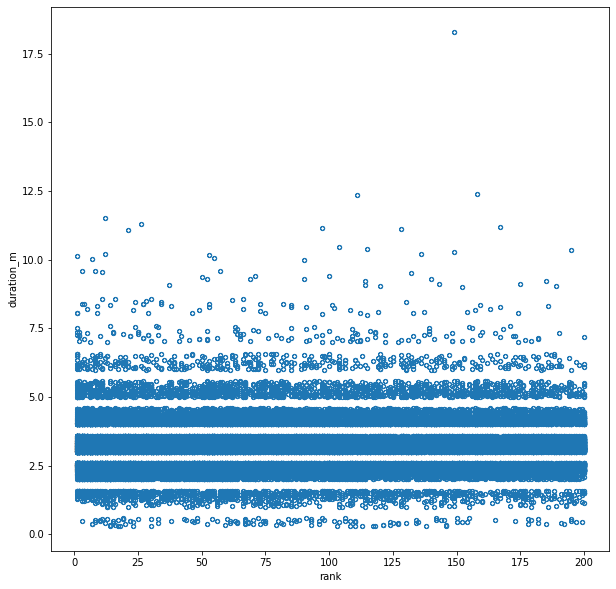

In [30]:
data.plot.scatter(x='rank', y='duration_m', figsize=(10, 10), marker = '$\u25EF$')

In [34]:
data['duration_m'].describe()

count    57352.000000
mean         3.190209
std          0.850209
min          0.300000
25%          2.530000
50%          3.180000
75%          3.470000
max         18.290000
Name: duration_m, dtype: float64